<a href="https://colab.research.google.com/github/Rahul20037237/Build_your_own_NN/blob/main/TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import numpy as np
import pandas as pd
import nltk
import string as s
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import reuters
%matplotlib inline

In [ ]:
training=[i for i in reuters.fileids() if i.startswith('training/')]
testing=[i for i in reuters.fileids() if i.startswith('test/')]

def get_data_(file_ids):
    data = []
    for file_id in file_ids:
        text = " ".join(reuters.words(file_id))
        categories = ", ".join(reuters.categories(file_id))
        data.append({"text": text, "categories": categories})
    return pd.DataFrame(data)

train_data = get_data_(training)
test_data = get_data_(testing)
print(train_data.head())
print(test_data.head())

                                                text    categories
0  BAHIA COCOA REVIEW Showers continued throughou...         cocoa
1  COMPUTER TERMINAL SYSTEMS & lt ; CPML > COMPLE...           acq
2  N . Z . TRADING BANK DEPOSIT GROWTH RISES SLIG...  money-supply
3  NATIONAL AMUSEMENTS AGAIN UPS VIACOM & lt ; VI...           acq
4  ROGERS & lt ; ROG > SEES 1ST QTR NET UP SIGNIF...          earn
                                                text  \
0  ASIAN EXPORTERS FEAR DAMAGE FROM U . S .- JAPA...   
1  CHINA DAILY SAYS VERMIN EAT 7 - 12 PCT GRAIN S...   
2  JAPAN TO REVISE LONG - TERM ENERGY DEMAND DOWN...   
3  THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Tha...   
4  INDONESIA SEES CPO PRICE RISING SHARPLY Indone...   

                                     categories  
0                                         trade  
1                                         grain  
2                                crude, nat-gas  
3  corn, grain, rice, rubber, sugar, tin, trade  
4          

In [ ]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def word_tokenize(txt):
    tokens = re.findall(r"[\w']+", txt)
    return tokens

def remove_stopwords(lst):
    stop = set(stopwords.words('english'))
    return [i for i in lst if i.lower() not in stop]

def remove_punctuations(lst):
    return [i.translate(str.maketrans('', '', s.punctuation)) for i in lst]

def remove_numbers(lst):
    return [re.sub(r'\d+', '', i) for i in lst if i]

def stemming(text):
    porter_stemmer = nltk.PorterStemmer()
    return [porter_stemmer.stem(word) for word in text]

def lemmatization(lst):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in lst]

def remove_extra_words(lst):
    stop = {'href', 'lt', 'gt', 'ii', 'iii', 'ie', 'quot', 'com'}
    return [word for word in lst if word not in stop]


In [ ]:
train_x = train_data.text
test_x = test_data.text
train_y = train_data.categories
test_y = test_data.categories



train_x = train_x.apply(remove_html).apply(remove_urls).apply(word_tokenize)
train_x = train_x.apply(remove_stopwords).apply(remove_punctuations).apply(remove_numbers)
train_x = train_x.apply(stemming).apply(lemmatization).apply(remove_extra_words)
train_x = train_x.apply(lambda x: ' '.join(x))

test_x = test_x.apply(remove_html).apply(remove_urls).apply(word_tokenize)
test_x = test_x.apply(remove_stopwords).apply(remove_punctuations).apply(remove_numbers)
test_x = test_x.apply(stemming).apply(lemmatization).apply(remove_extra_words)
test_x = test_x.apply(lambda x: ' '.join(x))




In [ ]:
tfidf = TfidfVectorizer(min_df=1100, ngram_range=(1, 10))
train_1 = tfidf.fit_transform(train_x)
test_1 = tfidf.transform(test_x)

print("No. of features extracted:", len(tfidf.get_feature_names_out()))
print(tfidf.get_feature_names_out()[:100])

train_arr = train_1.toarray()
test_arr = test_1.toarray()


No. of features extracted: 36
['also' 'april' 'bank' 'billion' 'compani' 'corp' 'ct' 'dlr' 'end'
 'expect' 'inc' 'includ' 'last' 'loss' 'march' 'market' 'mln' 'mln dlr'
 'mln mln' 'net' 'new' 'note' 'one' 'oper' 'pct' 'price' 'qtr' 'said'
 'sale' 'share' 'shr' 'stock' 'trade' 'two' 'would' 'year']


In [ ]:
train_arr[:100]

array([[0.05748433, 0.24397476, 0.        , ..., 0.        , 0.05430739,
        0.08089003],
       [0.20083913, 0.        , 0.        , ..., 0.        , 0.28460926,
        0.07065353],
       [0.        , 0.        , 0.44616516, ..., 0.        , 0.        ,
        0.39673362],
       ...,
       [0.        , 0.        , 0.28112889, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.8364867 , ..., 0.19238509, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
data = pd.DataFrame(train_arr[:100], columns=tfidf.get_feature_names_out())
data .style. background_gradient(axis=0,vmin=0,vmax=1,cmap="hot_r")

,also,april,bank,billion,compani,corp,ct,dlr,end,expect,inc,includ,last,loss,march,market,mln,mln dlr,mln mln,net,new,note,one,oper,pct,price,qtr,said,sale,share,shr,stock,trade,two,would,year
0,0.057484,0.243975,0.000000,0.000000,0.000000,0.000000,0.000000,0.552680,0.177724,0.060179,0.000000,0.060304,0.055492,0.000000,0.240786,0.000000,0.188847,0.000000,0.000000,0.000000,0.538912,0.000000,0.000000,0.000000,0.000000,0.059429,0.000000,0.149558,0.408183,0.000000,0.000000,0.000000,0.060994,0.000000,0.054307,0.080890
1,0.200839,0.000000,0.000000,0.000000,0.339906,0.000000,0.000000,0.275851,0.000000,0.000000,0.163250,0.105344,0.000000,0.000000,0.000000,0.100284,0.065980,0.000000,0.000000,0.000000,0.000000,0.000000,0.095175,0.106357,0.158015,0.311450,0.000000,0.365770,0.203730,0.459206,0.000000,0.318399,0.000000,0.000000,0.284609,0.070654
2,0.000000,0.000000,0.446165,0.440525,0.000000,0.000000,0.000000,0.096810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.146842,0.000000,0.000000,0.000000,0.554553,0.000000,0.000000,0.146705,0.000000,0.000000,0.000000,0.000000,0.299150,0.000000,0.000000,0.396734
3,0.000000,0.000000,0.000000,0.000000,0.148272,0.000000,0.289939,0.240660,0.000000,0.000000,0.569695,0.183811,0.000000,0.000000,0.183485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332134,0.000000,0.137856,0.000000,0.000000,0.273521,0.000000,0.320499,0.000000,0.370374,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.186854,0.196594,0.182693,0.303283,0.000000,0.231162,0.000000,0.000000,0.213159,0.000000,0.000000,0.000000,0.145082,0.209228,0.000000,0.191909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.226524,0.459592,0.447980,0.201948,0.000000,0.000000,0.000000,0.000000,0.000000,0.310718
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.405729,0.000000,0.000000,0.000000,0.000000,0.222752,0.000000,0.783032,0.000000,0.000000,0.000000,0.415484,0.000000,0.000000
6,0.000000,0.000000,0.239878,0.000000,0.192406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.238101,0.681195,0.000000,0.000000,0.000000,0.000000,0.473691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236625,0.000000,0.000000,0.000000,0.000000,0.241254,0.000000,0.214807,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.364172,0.100759,0.000000,0.000000,0.119259,0.153914,0.000000,0.307647,0.000000,0.000000,0.385600,0.000000,0.308745,0.510058,0.000000,0.146480,0.000000,0.155394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281049,0.000000,0.000000,0.000000,0.000000,0.309687
8,0.000000,0.000000,0.000000,0.412595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.779088,0.000000,0.000000,0.103053,0.200898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.139342
9,0.532845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.555043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.517159,0.000000,0.374901


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB(alpha=0.52)
nb_model.fit(train_arr, train_y)
pred = nb_model.predict(test_arr)

print("First 20 actual labels:", test_y.tolist()[:20])
print("First 20 predicted labels:", pred.tolist()[:20])

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
print("F1 score of the model:", f1_score(test_y, pred, average='micro'))
print("Accuracy of the model:", accuracy_score(test_y, pred))
print("Accuracy of the model in percentage:", round(accuracy_score(test_y, pred) * 100, 3), "%")

First 20 actual labels: ['trade', 'grain', 'crude, nat-gas', 'corn, grain, rice, rubber, sugar, tin, trade', 'palm-oil, veg-oil', 'ship', 'coffee, lumber, palm-oil, rubber, veg-oil', 'grain, wheat', 'gold', 'acq', 'tin', 'interest, money-fx', 'acq, copper', 'ipi', 'carcass, corn, grain, livestock, oilseed, rice, soybean, trade', 'earn', 'earn', 'interest, money-fx', 'bop, trade', 'gas, lead']
First 20 predicted labels: ['trade', 'acq', 'acq', 'interest', 'acq', 'acq', 'trade', 'acq', 'acq', 'acq', 'acq', 'money-fx', 'acq', 'acq', 'acq', 'acq', 'earn', 'money-fx', 'trade', 'acq']
F1 score of the model: 0.5995362702881749
Accuracy of the model: 0.5995362702881749
Accuracy of the model in percentage: 59.954 %


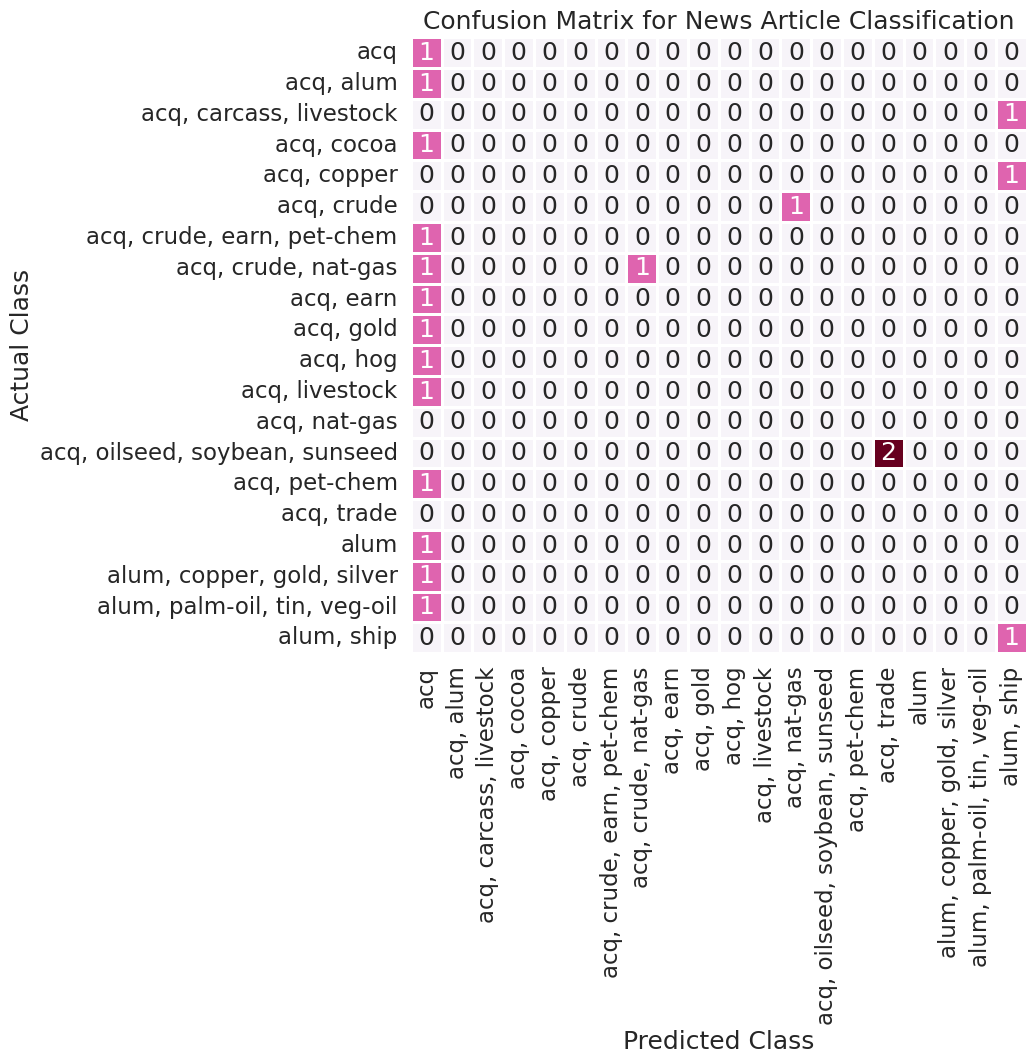

In [ ]:
sns.set(font_scale=1.5)
class_labels = sorted(set(test_y).union(set(pred)))

# Create a confusion matrix DataFrame with dynamic labels
cof = confusion_matrix(test_y[:20], pred[:20])
cof = pd.DataFrame(cof, index=class_labels[:20], columns=class_labels[:20])

# Visualize the confusion matrix
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.5)
sns.heatmap(cof, cmap="PuRd", linewidths=1, annot=True, square=True, cbar=False, fmt='d')
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix for News Article Classification")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import string as s
from tqdm import tqdm
from nltk.corpus import reuters, stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Preprocessing functions
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def word_tokenize(txt):
    tokens = re.findall(r"[\w']+", txt)
    return tokens

def remove_stopwords(lst):
    stop = set(stopwords.words('english'))
    return [i for i in lst if i.lower() not in stop]

def remove_punctuations(lst):
    return [i.translate(str.maketrans('', '', s.punctuation)) for i in lst]

def remove_numbers(lst):
    return [re.sub(r'\d+', '', i) for i in lst if i]

def stemming(lst):
    porter_stemmer = nltk.PorterStemmer()
    return [porter_stemmer.stem(word) for word in lst]

def lemmatization(lst):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in lst]

def preprocess_text(text_series):
    return text_series.apply(remove_html).apply(remove_urls).apply(word_tokenize).apply(remove_stopwords).apply(remove_punctuations).apply(remove_numbers).apply(stemming).apply(lemmatization).apply(lambda x: ' '.join(x))

# Load and preprocess the dataset
training = [i for i in reuters.fileids() if i.startswith('training/')]
testing = [i for i in reuters.fileids() if i.startswith('test/')]

def get_data_(file_ids):
    data = []
    for file_id in file_ids:
        text = " ".join(reuters.words(file_id))
        categories = ", ".join(reuters.categories(file_id))
        data.append({"text": text, "categories": categories})
    return pd.DataFrame(data)

train_data = get_data_(training)
test_data = get_data_(testing)

train_data['text'] = preprocess_text(train_data['text'])
test_data['text'] = preprocess_text(test_data['text'])

# TF-IDF Vectorization
tfidf = TfidfVectorizer(min_df=5, ngram_range=(1, 3))
train_x = tfidf.fit_transform(train_data['text'])
test_x = tfidf.transform(test_data['text'])

train_y = train_data['categories']
test_y = test_data['categories']

print("No. of features extracted:", len(tfidf.get_feature_names_out()))
print(tfidf.get_feature_names_out()[:100])

# Compute class weights
unique_classes = train_y.unique()
class_weights = compute_class_weight('balanced', classes=unique_classes, y=train_y)
class_weight_dict = {cls: weight for cls, weight in zip(unique_classes, class_weights)}

# Train Random Forest Classifier with tqdm
clf = RandomForestClassifier(n_estimators=100, class_weight=class_weight_dict, random_state=42)

print("Training Random Forest Classifier:")
with tqdm(total=100) as pbar:
    clf.fit(train_x, train_y)
    pbar.update(100)

# Predictions and Evaluation
pred = clf.predict(test_x)

print("First 20 actual labels:", test_y.tolist()[:20])
print("First 20 predicted labels:", pred.tolist()[:20])

print("F1 score of the model:", f1_score(test_y, pred, average='micro'))
print("Accuracy of the model:", accuracy_score(test_y, pred))
print("Accuracy of the model in percentage:", round(accuracy_score(test_y, pred) * 100, 3), "%")


No. of features extracted: 25746
['aa' 'ab' 'ab lt' 'ab lt bld' 'ab sweden' 'abandon' 'abdul' 'abid'
 'abid agreement' 'abil' 'abil obtain' 'abl' 'abolish' 'abolit' 'abroad'
 'absenc' 'absolut' 'absorb' 'abund' 'abus' 'acceler' 'accentu' 'accept'
 'accept bid' 'accept bid export' 'accept bonu' 'accept export'
 'accept export bonu' 'accept fell' 'accept fell mln' 'accept level'
 'accept loan' 'accept offer' 'accept pct' 'accept propos' 'access'
 'access european' 'access japanes' 'accid' 'accommod' 'accompani'
 'accomplish' 'accord' 'accord agreement' 'accord analyst' 'accord bank'
 'accord central' 'accord central bank' 'accord compani' 'accord figur'
 'accord latest' 'accord market' 'accord offici' 'accord offici figur'
 'accord portland' 'accord portland merchant' 'accord preliminari'
 'accord reach' 'accord report' 'accord said' 'accord seen' 'accord set'
 'accord sign' 'accordingli' 'account' 'account balanc'
 'account balanc payment' 'account billion' 'account chang'
 'account def

100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


First 20 actual labels: ['trade', 'grain', 'crude, nat-gas', 'corn, grain, rice, rubber, sugar, tin, trade', 'palm-oil, veg-oil', 'ship', 'coffee, lumber, palm-oil, rubber, veg-oil', 'grain, wheat', 'gold', 'acq', 'tin', 'interest, money-fx', 'acq, copper', 'ipi', 'carcass, corn, grain, livestock, oilseed, rice, soybean, trade', 'earn', 'earn', 'interest, money-fx', 'bop, trade', 'gas, lead']
First 20 predicted labels: ['trade', 'acq', 'earn', 'earn', 'palm-oil, veg-oil', 'ship', 'rubber', 'grain, wheat', 'gold', 'acq', 'tin', 'money-fx', 'copper', 'ipi', 'carcass, livestock', 'earn', 'earn', 'money-fx', 'bop, trade', 'acq']
F1 score of the model: 0.8125207022192779
Accuracy of the model: 0.8125207022192779
Accuracy of the model in percentage: 81.252 %


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00
